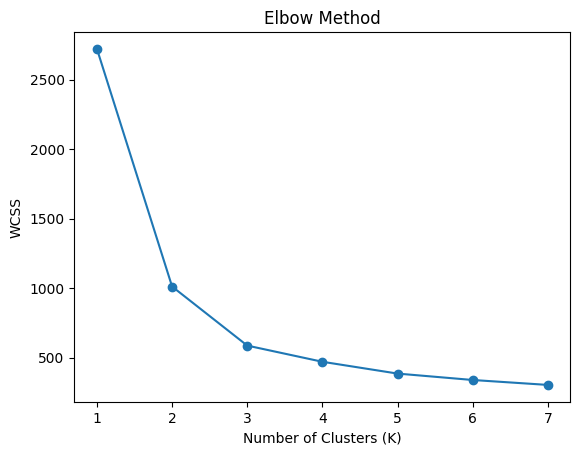

Cluster Centers:

Cluster 1
Feature_1: 14.65
Feature_2: 14.46
Feature_3: 0.88
Feature_4: 5.56
Feature_5: 3.28
Feature_6: 2.65
Feature_7: 5.19

Cluster 2
Feature_1: 11.96
Feature_2: 13.27
Feature_3: 0.85
Feature_4: 5.23
Feature_5: 2.87
Feature_6: 4.76
Feature_7: 5.09

Cluster 3
Feature_1: 18.72
Feature_2: 16.30
Feature_3: 0.89
Feature_4: 6.21
Feature_5: 3.72
Feature_6: 3.60
Feature_7: 6.07



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Samaira Singh\Downloads\MANAS\seeds_data.csv")

# Last column is target label (seed type) – DO NOT use for clustering
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values   # used later only for visualization
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        # Assignment step
        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            clusters[np.argmin(distances)].append(x)

        # Update step
        new_centroids = []
        for cluster in clusters:
            new_centroids.append(np.mean(cluster, axis=0))

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters
def wcss(X, clusters, centroids):
    total = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            total += euclidean_distance(point, centroids[i]) ** 2
    return total
wcss_values = []
K = range(1, 8)

for k in K:
    centroids, clusters = kmeans(X, k)
    wcss_values.append(wcss(X, clusters, centroids))

plt.plot(K, wcss_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()
def silhouette_score(X, labels):
    scores = []

    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == c] for c in set(labels) if c != labels[i]]

        a = np.mean([euclidean_distance(X[i], x) for x in same_cluster if not np.array_equal(x, X[i])])
        b = min([np.mean([euclidean_distance(X[i], x) for x in cluster]) for cluster in other_clusters])

        scores.append((b - a) / max(a, b))

    return np.mean(scores)
k = 3
centroids, clusters = kmeans(X, k)

labels = np.zeros(len(X))
idx = 0
for i, cluster in enumerate(clusters):
    for _ in cluster:
        labels[idx] = i
        idx += 1
feature_names = data.columns[:-1]

print("Cluster Centers:\n")
for i, center in enumerate(centroids):
    print(f"Cluster {i + 1}")
    for name, val in zip(feature_names, center):
        print(f"{name}: {val:.2f}")
    print()

